Check for every metric what is normal.
Then select values that is outside this normal and check how the correlation varies.

Cluster the data

Check if we can regress a range instead of just a line

# Day 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_original = pd.read_csv('20200124_ews_observations.csv', low_memory=False)
df = pd.read_csv('20200124_ews_observations.csv', low_memory=False)
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.dtypes

PatientId                   int64
ObservationDate    datetime64[ns]
EwsProcedure               object
EWS_Total                   int64
SBP                       float64
SBP_Score                 float64
LOC                        object
LOC_Score                   int64
SpO2                      float64
SpO2_Score                float64
Add_O2                     object
Add_O2_Score              float64
HR                          int64
HR_Score                    int64
RR                          int64
RR_Score                    int64
TEMP                      float64
TEMP_Score                  int64
dtype: object

In [2]:
df.head().T

,0,1,2,3,4
PatientId,29,30,31,32,33
ObservationDate,2019-05-01 13:27:50,2019-05-01 15:27:44,2019-05-01 15:54:27,2019-05-01 16:07:27,2019-05-01 17:03:16
EwsProcedure,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2
EWS_Total,0,3,1,0,0
SBP,143,NaN,117,NaN,135
SBP_Score,0,NaN,0,NaN,0
LOC,ALERT,ALERT,ALERT,ALERT,ALERT
LOC_Score,0,0,0,0,0
SpO2,96,94,95,98,97
SpO2_Score,0,1,1,0,0


In [3]:
df.shape

(171736, 18)

In [4]:
number_of_patients = df.PatientId.nunique()
number_of_patients

10136

In [5]:
for col in df:
    print(f"{col}: {df[col].nunique()}")

PatientId: 10136
ObservationDate: 170783
EwsProcedure: 1
EWS_Total: 17
SBP: 177
SBP_Score: 4
LOC: 5
LOC_Score: 2
SpO2: 64
SpO2_Score: 4
Add_O2: 2
Add_O2_Score: 2
HR: 180
HR_Score: 4
RR: 82
RR_Score: 4
TEMP: 78
TEMP_Score: 4


In [6]:
df_timesorted = df.sort_values(by='ObservationDate', ascending=True)
df_timesorted.head()

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0


In [7]:
df_timesorted = df.sort_values(by='ObservationDate', ascending=False)
df_timesorted.head()

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
171735,4853,2020-01-02 09:03:56,NEWS2,1,133.0,0.0,ALERT,0,98.0,0.0,False,0.0,84,0,15,0,35.9,1
171734,20527,2020-01-02 09:03:20,NEWS2,0,129.0,0.0,ALERT,0,98.0,0.0,False,0.0,70,0,16,0,36.5,0
171733,2499,2020-01-02 09:03:14,NEWS2,0,118.0,0.0,ALERT,0,98.0,0.0,False,0.0,82,0,20,0,36.2,0
171732,20480,2020-01-02 08:58:46,NEWS2,3,83.0,3.0,ALERT,0,92.0,0.0,False,0.0,79,0,18,0,36.8,0
171731,20278,2020-01-02 08:57:05,NEWS2,3,88.0,3.0,ALERT,0,100.0,0.0,False,0.0,72,0,14,0,36.1,0


In [8]:
df_patientsorted = df.sort_values(by='PatientId', ascending=True)
df_patientsorted.head()

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
461,30,2019-05-05 13:04:58,NEWS2,5,97.0,2.0,ALERT,0,96.0,0.0,False,0.0,90,0,28,3,36.2,0
78,30,2019-05-03 00:27:55,NEWS2,3,85.0,3.0,ALERT,0,99.0,0.0,False,0.0,79,0,18,0,36.2,0
77,30,2019-05-03 00:13:42,NEWS2,1,146.0,0.0,ALERT,0,100.0,0.0,False,0.0,94,1,15,0,36.2,0
922,30,2019-05-07 09:46:43,NEWS2,3,97.0,2.0,ALERT,0,95.0,1.0,False,0.0,87,0,16,0,36.1,0


In [9]:
patient_observations = df['PatientId'].value_counts().sort_values()
patient_observations

2047      1
7776      1
929       1
3232      1
7992      1
       ... 
1841    351
630     356
1261    441
5797    441
1743    643
Name: PatientId, Length: 10136, dtype: int64

In [10]:
def info_patient_dataframe(df, id_nr):
    patient = df.loc[df['PatientId'] == id_nr]
    patient = patient.sort_values(by='ObservationDate', ascending=False)
    n_measurements = patient.shape[0]
    print(f"Number of measurements: {n_measurements}")
    if n_measurements > 1:
        start_date = patient["ObservationDate"].iloc[0]
        end_date = patient["ObservationDate"].iloc[-1]
        #hospitalisation_time = end_date - start_date
        print(f"start_date: {start_date}")
        print(f"end_date: {end_date}")
    else:
        print("1 measurement")
    
    return patient
        

In [11]:
info_patient_dataframe(df, 31)

Number of measurements: 34
start_date: 2019-05-11 08:51:31
end_date: 2019-05-01 15:54:27


,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
2212,31,2019-05-11 08:51:31,NEWS2,0,119.0,0.0,ALERT,0,96.0,0.0,False,0.0,90,0,17,0,36.3,0
2159,31,2019-05-11 04:52:41,NEWS2,3,104.0,1.0,ALERT,0,94.0,1.0,False,0.0,97,1,16,0,37.1,0
2040,31,2019-05-10 18:23:09,NEWS2,1,111.0,0.0,ALERT,0,96.0,0.0,False,0.0,94,1,16,0,36.7,0
1854,31,2019-05-10 08:26:26,NEWS2,1,114.0,0.0,ALERT,0,97.0,0.0,False,0.0,61,0,16,0,36.0,1
1805,31,2019-05-10 05:19:41,NEWS2,2,117.0,0.0,ALERT,0,94.0,1.0,False,0.0,93,1,16,0,36.4,0
1742,31,2019-05-10 00:28:53,NEWS2,1,122.0,0.0,ALERT,0,98.0,0.0,False,0.0,94,1,17,0,36.4,0
1683,31,2019-05-09 19:11:42,NEWS2,1,125.0,0.0,ALERT,0,96.0,0.0,False,0.0,95,1,16,0,36.5,0
1625,31,2019-05-09 15:51:59,NEWS2,3,110.0,1.0,ALERT,0,95.0,1.0,False,0.0,101,1,14,0,36.7,0
1541,31,2019-05-09 11:34:21,NEWS2,1,112.0,0.0,ALERT,0,96.0,0.0,False,0.0,100,1,17,0,36.6,0
1354,31,2019-05-08 19:09:19,NEWS2,2,109.0,1.0,ALERT,0,96.0,0.0,False,0.0,104,1,18,0,36.5,0


# Day 2

-check HR normal rates  
-delete one liners and check correlation  
-see if correlation betters when removing data that is above the normal range

In [12]:
#check mean for SBP
sbp = df['SBP'].dropna()
mean_sbp = round(sbp.mean(),0)
print(mean_sbp)


df_cleaned = df.fillna(mean_sbp)
df_cleaned.head()

121.0


,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44,NEWS2,3,121.0,121.0,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27,NEWS2,0,121.0,121.0,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0


### Check HR

In [13]:


df_values = df_cleaned.drop(['SBP_Score', 'SpO2_Score', 'HR_Score', 'TEMP_Score', 'RR_Score', 'ObservationDate', 'EwsProcedure', 'Add_O2', 'LOC'], axis=1)
display(df_values.head())
df_values.corr()

,PatientId,EWS_Total,SBP,LOC_Score,SpO2,Add_O2_Score,HR,RR,TEMP
0,29,0,143.0,0,96.0,0.0,80,18,36.6
1,30,3,121.0,0,94.0,0.0,83,16,36.5
2,31,1,117.0,0,95.0,0.0,75,14,37.3
3,32,0,121.0,0,98.0,0.0,85,19,37.2
4,33,0,135.0,0,97.0,0.0,89,14,36.1


,PatientId,EWS_Total,SBP,LOC_Score,SpO2,Add_O2_Score,HR,RR,TEMP
PatientId,1.000000,-0.030384,0.008640,0.011073,0.027183,-0.014758,-0.057268,-0.029104,0.009706
EWS_Total,-0.030384,1.000000,-0.334304,0.135683,-0.274377,0.555040,0.426665,0.394173,0.120622
SBP,0.008640,-0.334304,1.000000,-0.008403,0.006721,-0.041954,-0.057242,-0.006171,-0.017198
LOC_Score,0.011073,0.135683,-0.008403,1.000000,-0.005956,0.017975,0.018421,0.028876,0.025984
SpO2,0.027183,-0.274377,0.006721,-0.005956,1.000000,-0.133213,-0.128971,-0.107647,-0.067439
Add_O2_Score,-0.014758,0.555040,-0.041954,0.017975,-0.133213,1.000000,0.201951,0.200177,0.119847
HR,-0.057268,0.426665,-0.057242,0.018421,-0.128971,0.201951,1.000000,0.277900,0.243363
RR,-0.029104,0.394173,-0.006171,0.028876,-0.107647,0.200177,0.277900,1.000000,0.160365
TEMP,0.009706,0.120622,-0.017198,0.025984,-0.067439,0.119847,0.243363,0.160365,1.000000


### Delete one liners

In [14]:
def make_dataframe_returning_patients(df, measurements):
    patient_observations_dict = df['PatientId'].value_counts().to_dict()
    
    pat_list = {k: v for k, v in patient_observations.items() if v < measurements}.keys()
    df_ret = df[~df.PatientId.isin(pat_list)]
    
    print(f"Number of patients: {df_ret.PatientId.nunique()}")
    print(f"Measurements: {df_ret.shape[0]}")
    return df_ret

    

In [52]:
df_n = make_dataframe_returning_patients(df_values, 200)
df_n = df_n.sort_values(by=['PatientId'])
df_n['PatientId'].unique()

    #check if function worked
#df_5.PatientId.value_counts()

Number of patients: 34
Measurements: 9297


array([ 362,  523,  630, 1068, 1092, 1199, 1257, 1261, 1278, 1285, 1474,
       1664, 1743, 1753, 1835, 1841, 2115, 2193, 2602, 3080, 3174, 3433,
       3540, 3553, 4614, 4672, 4764, 5447, 5678, 5797, 6755, 6764, 6995,
       7777], dtype=int64)

In [16]:
# compare pairplots

Text(0.5, 1.0, 'Correlation Heatmap FULL DF')

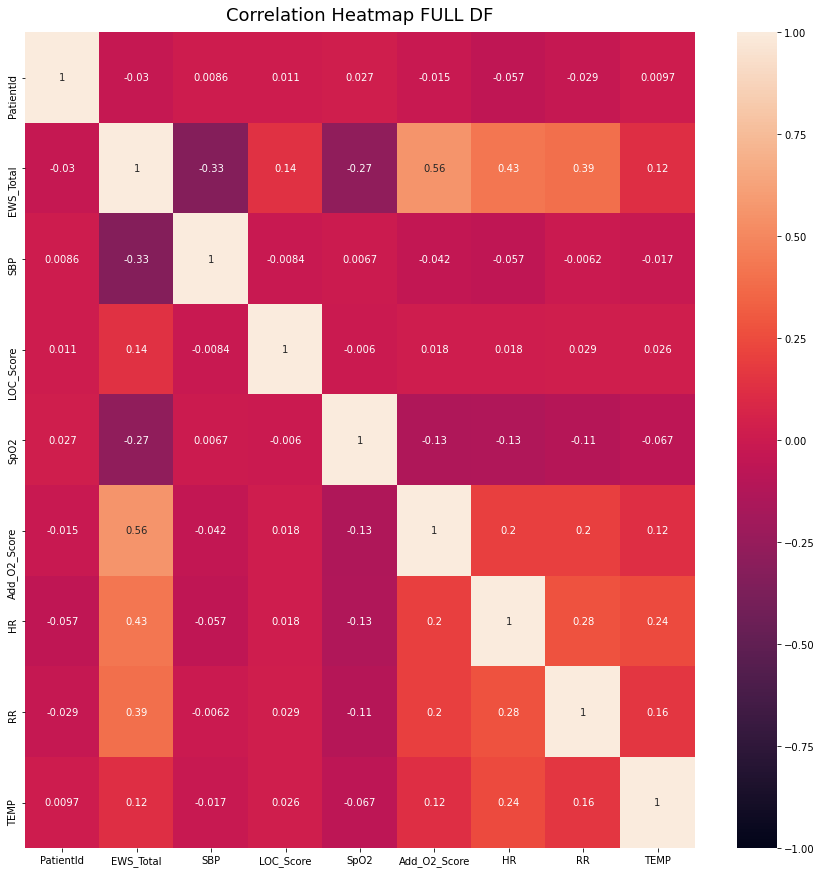

In [17]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df_values.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap FULL DF', fontdict={'fontsize':18}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap DF N')

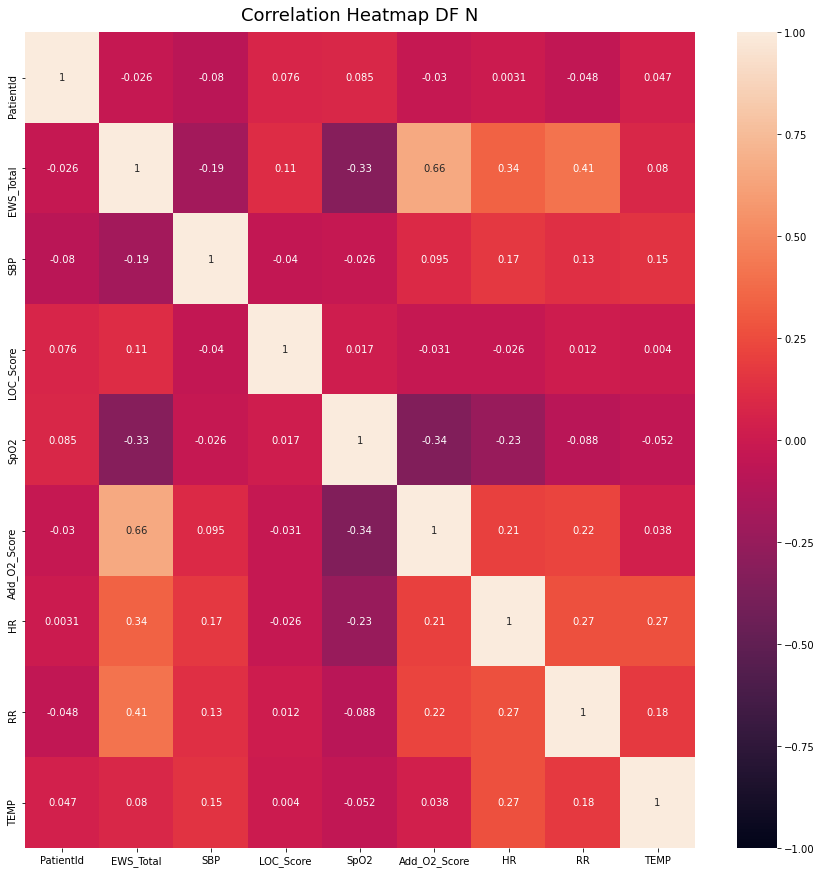

In [18]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df_n.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap DF N', fontdict={'fontsize':18}, pad=12)

-----------
We can see that it doesn't change much if we leave out one liners or take patients with more then N observations  

### Check records for some patients

In [19]:
df_three_pat = make_dataframe_returning_patients(df, 400)
df_three_pat['ObservationDate'] = pd.to_datetime(df_three_pat['ObservationDate'])
df_three_pat.head()

Number of patients: 3
Measurements: 1525


<ipython-input-19-41f8440fbb98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_three_pat['ObservationDate'] = pd.to_datetime(df_three_pat['ObservationDate'])


,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
13868,1261,2019-06-06 05:42:27,NEWS2,3,94.0,2.0,ALERT,0,96.0,0.0,False,0.0,76,0,12,0,36.0,1
14006,1261,2019-06-06 10:14:27,NEWS2,1,107.0,1.0,ALERT,0,99.0,0.0,False,0.0,51,0,18,0,36.9,0
14136,1261,2019-06-06 13:46:07,NEWS2,1,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,70,0,18,0,36.9,0
14311,1261,2019-06-06 19:19:15,NEWS2,1,108.0,1.0,ALERT,0,96.0,0.0,False,0.0,70,0,16,0,37.0,0
14585,1261,2019-06-07 06:06:13,NEWS2,1,104.0,1.0,ALERT,0,99.0,0.0,False,0.0,70,0,16,0,36.8,0


<AxesSubplot:xlabel='ObservationDate', ylabel='EWS_Total'>

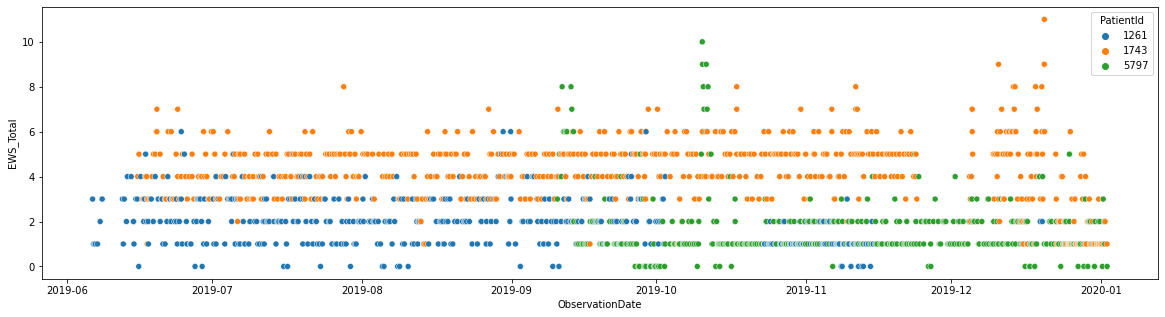

In [20]:
plt.figure(figsize=(20, 5))
sns.scatterplot(data = df_three_pat, x = 'ObservationDate', y = 'EWS_Total', hue='PatientId', palette = "tab10")

We check rico (slope, rate of change) as rolling_average of N samples (maybe it is better to check for N hours).  
Only when rico is above certain value we can raise alarm and maybe do a prediction (regression)  
Rate of change should be on the metrics not the ews total because the step is to high and is harder to measure  

TAKE MOVING AVERAGE AND REGRESS ON THE AVERAGE

# Day 3

### Moving averages

In [21]:
def add_moving_averages(df_patient, window, name_column = 'EWS_MA'):
    if name_column in df_patient.columns:
        df_patient.drop(name_column, inplace=True, axis=1)
    
    df_patient[name_column] = df_patient.EWS_Total.rolling(window=window).mean()
    return df_patient
    

In [22]:
def remove_scores(df):
    df = df.drop(['SBP_Score', 'SpO2_Score', 'HR_Score', 'TEMP_Score', 'RR_Score', 'EwsProcedure', 'Add_O2', 'LOC'], axis=1)
    return df

In [23]:
def check_patient(patient_id, df, window, plot=False):
    patient_df = remove_scores(df)
    patient_df = info_patient_dataframe(patient_df, patient_id)
    patient_df = add_moving_averages(patient_df, window)
    display(patient_df.head())
    columns=[]
    if plot:
        fig, ax = plt.subplots(figsize=(15,15))
        sns.lineplot(data=patient_df, x="ObservationDate", y='EWS_MA', linestyle='-', ax=ax)
        sns.scatterplot(data=patient_df, x="ObservationDate", y='EWS_MA', marker='o', linestyle='-', hue="Add_O2_Score", palette="tab10", ax=ax)
    
    return patient_df

In [24]:
#check for adding O2 and its impact
window = 50
patient = check_patient(1743, df, window, plot=False)

Number of measurements: 643
start_date: 2020-01-02 06:51:46
end_date: 2019-06-15 13:32:39


,PatientId,ObservationDate,EWS_Total,SBP,LOC_Score,SpO2,Add_O2_Score,HR,RR,TEMP,EWS_MA
171696,1743,2020-01-02 06:51:46,1,120.0,0,95.0,0.0,93,18,36.5,NaN
171496,1743,2020-01-01 21:30:12,2,102.0,0,96.0,0.0,101,20,37.1,NaN
171290,1743,2020-01-01 14:56:00,1,116.0,0,93.0,0.0,107,16,37.6,NaN
171182,1743,2020-01-01 11:10:28,3,116.0,0,95.0,0.0,98,24,37.1,NaN
171085,1743,2020-01-01 06:54:48,1,120.0,0,95.0,0.0,98,15,36.5,NaN


### Calculate derivative of dataframe of certain patient

In [25]:
df_derivative = patient.filter(['ObservationDate', 'EWS_MA'], axis=1)
df_derivative = df_derivative[window:100]
display(df_derivative.head())

time_seconds = df_derivative.ObservationDate.astype('datetime64[s]').astype('int64')
y = df_derivative.EWS_MA
slope = np.gradient(y, time_seconds)
df_derivative['Slope'] = slope
display(df_derivative.head())
df_derivative.nunique()

,ObservationDate,EWS_MA
165851,2019-12-23 20:24:59,1.86
165674,2019-12-23 15:00:58,1.86
165554,2019-12-23 11:47:50,1.88
165359,2019-12-23 06:07:14,1.86
165306,2019-12-23 02:48:50,1.86


,ObservationDate,EWS_MA,Slope
165851,2019-12-23 20:24:59,1.86,-0.000000e+00
165674,2019-12-23 15:00:58,1.86,-1.081365e-15
165554,2019-12-23 11:47:50,1.88,-7.472583e-16
165359,2019-12-23 06:07:14,1.86,3.602359e-16
165306,2019-12-23 02:48:50,1.86,0.000000e+00


ObservationDate    50
EWS_MA             37
Slope              48
dtype: int64

<AxesSubplot:label='694ea608-f0b1-4695-add2-3c24a4edd6b5', xlabel='ObservationDate', ylabel='EWS_MA'>

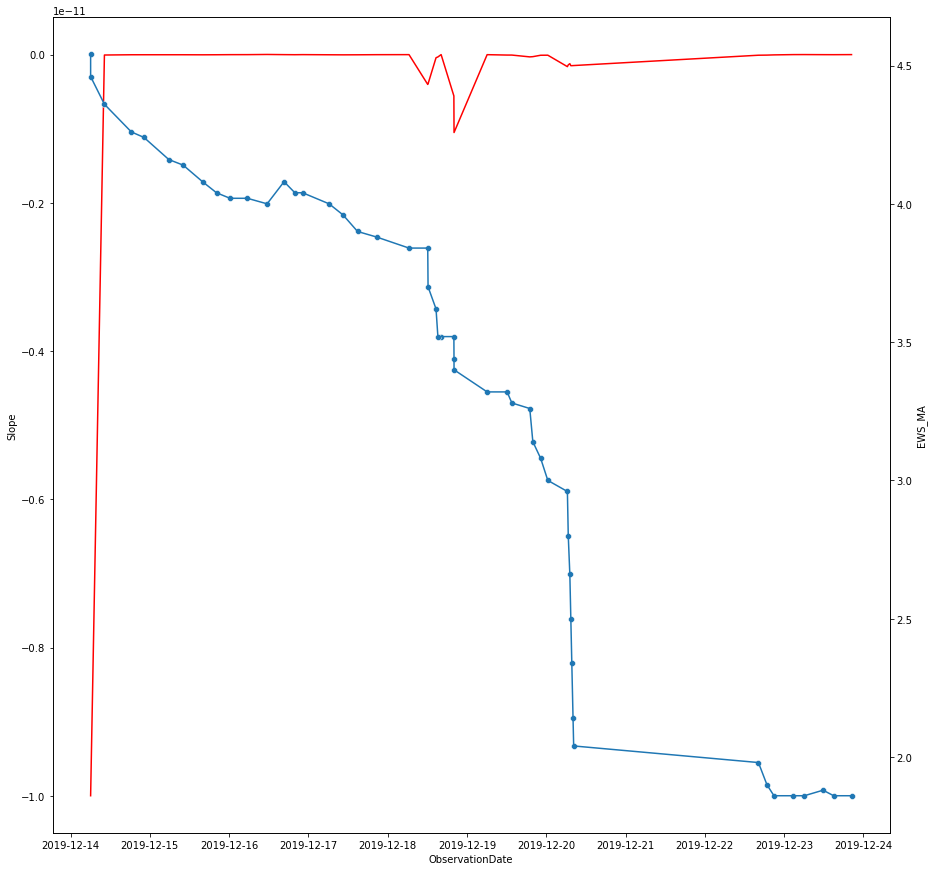

In [26]:
fig, ax = plt.subplots(figsize=(15,15))
sns.lineplot(data=df_derivative, x="ObservationDate", y="Slope", ax=ax, color='r')
ax2 = ax.twinx()
sns.lineplot(data=df_derivative, x="ObservationDate", y='EWS_MA', linestyle='-', ax=ax2)
sns.scatterplot(data=df_derivative, x="ObservationDate", y='EWS_MA', marker='o', linestyle='-', ax=ax2)

Derivative should be continuous  
https://stackoverflow.com/questions/39235712/calculate-local-time-derivative-of-series

# Day 4

Try to apply arma model to ews_total

In [27]:
import warnings
warnings.filterwarnings("ignore")

def make_arma_model(df, id_nr):
    return 0

df1743 = info_patient_dataframe(df, 1743)
df1743 = df1743.filter(['ObservationDate', 'HR'], axis=1)
df1743 = df1743.sort_values(by='ObservationDate', ascending=True)
df1743 = df1743.set_index('ObservationDate')


df1743.head()

Number of measurements: 643
start_date: 2020-01-02 06:51:46
end_date: 2019-06-15 13:32:39


,HR
ObservationDate,
2019-06-15 13:32:39,112
2019-06-15 20:22:36,104
2019-06-16 14:23:34,103
2019-06-16 19:49:24,107
2019-06-17 04:39:15,97


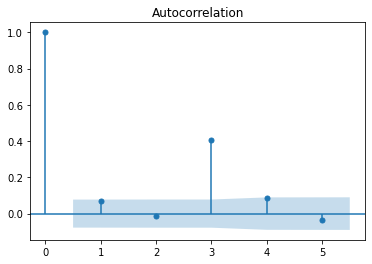

In [28]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(df1743, lags=5)
plt.show()

In [29]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(df1743["HR"], (1,0))
results = model.fit()


C:\Users\Nathan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [30]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                     HR   No. Observations:                  643
Model:                     ARMA(1, 0)   Log Likelihood               -2230.914
Method:                       css-mle   S.D. of innovations              7.773
Date:                Thu, 14 Jan 2021   AIC                           4467.828
Time:                        11:03:25   BIC                           4481.226
Sample:                             0   HQIC                          4473.027
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.4186      0.330    307.608      0.000     100.772     102.065
ar.L1.HR       0.0704      0.039      1.787      0.074      -0.007       0.148
                                    Roots           

In [31]:
print(f'μ = {results.params[0]}, phi = {results.params[1]}')

μ = 101.41860169713105, phi = 0.07042140773553032


C:\Users\Nathan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Nathan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


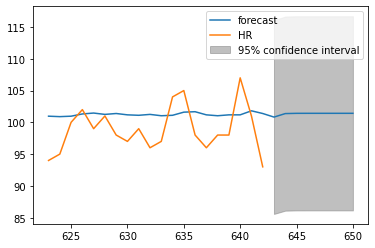

In [32]:
results.plot_predict(start=623, end=650)
plt.show()

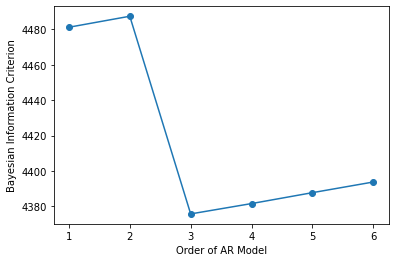

In [33]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA
import warnings
warnings.filterwarnings("ignore")

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(df1743["HR"], order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

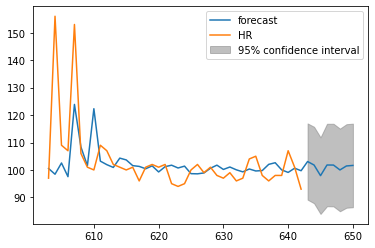

In [34]:
model = ARMA(df1743["HR"], (3,0))
results = model.fit()
results.plot_predict(start=603, end=650)
plt.show()

[4477.94680965 4480.87838174 4481.32783408 4398.94779755 4405.24987264
 4409.95935969 4396.58899832 4394.81514804 4400.9780043  4407.40848139]


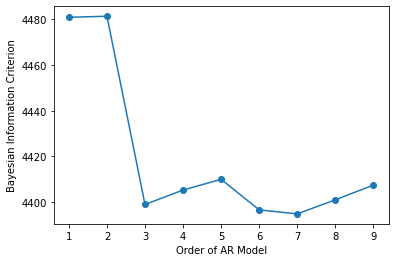

In [35]:
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
test_nr = 10
AIC = np.zeros(test_nr)
for p in range(test_nr):
    mod = ARMA(df1743["HR"], order=(0,p))
    res = mod.fit()
# Save BIC for AR(p)    
    AIC[p] = res.bic
print(AIC)
    
# Plot the BIC as a function of p
plt.plot(range(1,test_nr), AIC[1:test_nr], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

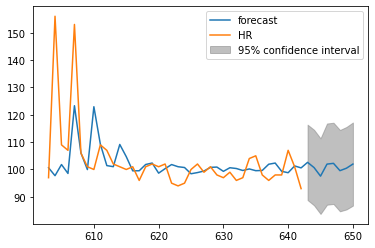

In [36]:
model = ARMA(df1743["HR"], (3,7))
results = model.fit()
results.plot_predict(start=603, end=650)
plt.show()

Test the model on multiple variables

# Day 5

### Making function to calculate NEWS2 score from parameters

In [37]:
def calculate_news2_scale1 (rr, spo2, air_score, sbp, hr, loc_score, temp, check=False):
    score = 0
    # RR SCORE - normal values: 12-20
    if rr <= 8 or rr >= 25:
        rr_score = 3
    elif 21 <= rr <= 24:
        rr_score = 2
    elif 9 <= rr <= 11:
        rr_score = 1
    else:
        rr_score = 0
    
    # SPO2 SCORE - normal values: >= 96
    if spo2 <= 91:
        spo2_score = 3
    elif 92 <= spo2 <= 93:
        spo2_score = 2
    elif 94 <= spo2 <= 95:
        spo2_score = 1
    else:
        spo2_score = 0
    
    # OXYGEN METHOD SCORE 
    # 0 -> Room Air 
    # 3 -> Oxygen Mask
    try:
        assert air_score == 0 or air_score == 2, "Air_score is not 0 or 2"
    except AssertionError:
        raise
    
    # SBP SCORE - normal values: 111-219
    if sbp <= 90 or sbp >= 220:
        sbp_score = 3
    elif 91 <= sbp <= 100:
        sbp_score = 2
    elif 101 <= sbp <= 110:
        sbp_score = 1
    else:
        sbp_score = 0
    
    # HR SCORE - normal values: 51-90
    if hr <= 40 or hr >= 131:
        hr_score = 3
    elif 111 <= hr <= 130:
        hr_score = 2
    elif 91 <= hr <= 110 or 41 <= hr <= 50:
        hr_score = 1
    else:
        hr_score = 0
    
    # CONSCIOUSNESS METHOD SCORE 
    # 0 -> Alert 
    # 3 -> CVPU (Confusion, Voice, Pain, Unresponsive)
    try:
        assert loc_score == 0 or loc_score == 3, "loc_score is not 0 or 3"
    except AssertionError:
        raise
    
    # TEMP SCORE - normal values: 51-90
    if temp <= 35.0:
        temp_score = 3
    elif temp > 39.1:
        temp_score = 2
    elif 35.1 <= temp <= 36.0 or 38.1 <= temp <= 39.0:
        temp_score = 1
    else:
        temp_score = 0
    
    if check:
        print(f'rr_score: {rr_score}')
        print(f'spo2_score: {spo2_score}')
        print(f'air_score: {air_score}')
        print(f'sbp_score: {sbp_score}')
        print(f'hr_score: {hr_score}')
        print(f'loc_score: {loc_score}')
        print(f'temp_score: {temp_score}')
    
    ews_total = rr_score + spo2_score + air_score + sbp_score + hr_score + loc_score + temp_score
    
    return ews_total

### testing function

In [38]:
# test score
test = calculate_news2_scale1(rr=12, spo2 = 90, air_score = 0, sbp = 112, 
                       hr=60, loc_score=0, temp=35)
print(f"The NEWS2 score of the patient is: {test}")

The NEWS2 score of the patient is: 6


In [39]:
test_df = df_cleaned.drop(['SBP_Score', 'SpO2_Score', 'HR_Score', 'TEMP_Score', 'RR_Score', 'ObservationDate', 'EwsProcedure', 'Add_O2', 'LOC'], axis=1)
test_df = test_df.sample(n=5000)
test_df = test_df.reset_index(drop=True)

In [40]:
print(test_df.shape)
test_df.head(16)

(5000, 9)


,PatientId,EWS_Total,SBP,LOC_Score,SpO2,Add_O2_Score,HR,RR,TEMP
0,5583,0,158.0,0,96.0,0.0,62,15,36.6
1,275,1,121.0,0,100.0,0.0,53,10,36.1
2,8326,0,132.0,0,98.0,0.0,68,16,36.5
3,8297,1,136.0,0,91.0,0.0,92,16,36.5
4,8554,1,130.0,0,90.0,0.0,80,20,35.6
5,4435,0,143.0,0,96.0,0.0,68,14,37.4
6,2830,0,131.0,0,98.0,0.0,65,16,36.5
7,3144,0,123.0,0,98.0,0.0,65,14,37.1
8,20494,2,104.0,0,95.0,0.0,65,17,36.1
9,7093,5,132.0,3,98.0,2.0,80,18,37.4


In [41]:
check_row = []
to_print = False
for index, row in test_df.iterrows():
    ews_row_calc = calculate_news2_scale1(rr=row.RR, spo2=row.SpO2, air_score=row.Add_O2_Score, sbp=row.SBP, 
                                   hr=row.HR, loc_score=row.LOC_Score, temp=row.TEMP, check=to_print)
    if int(ews_row_calc) == int(row.EWS_Total):
        check_row.append(True)
        if to_print == True:
            print("-----")
        
    else:
        check_row.append(False)
        if to_print == True:
            print(f"{row.name}: false")
            print(f"calculated: {ews_row_calc} != given: {row.EWS_Total}")
            print("-----")
            
hit_perc = (check_row.count(True)/len(check_row))*100
print(f"Accuracy of function: {hit_perc}")


Accuracy of function: 85.11999999999999


Accuracy of the function that calculates EWS based on the table given by   https://www.rcplondon.ac.uk/projects/outputs/national-early-warning-score-news-2  
-> 85.5% (50000 samples)

If the first scale results in a different ews, try the second scale

In [42]:
def calculate_news2_scale2 (rr, spo2, air_score, sbp, hr, loc_score, temp, check=False):
    score = 0
    # RR SCORE - normal values: 12-20
    if rr <= 8 or rr >= 25:
        rr_score = 3
    elif 21 <= rr <= 24:
        rr_score = 2
    elif 9 <= rr <= 11:
        rr_score = 1
    else:
        rr_score = 0
    
    # SPO2 SCORE - normal values: >= 96
    if spo2 <= 83 or spo2 >= 97:
        spo2_score = 3
    elif 84 <= spo2 <= 85 or 95 <= spo2 <= 96:
        spo2_score = 2
    elif 86 <= spo2 <= 87 or 93 <= spo2 <= 94:
        spo2_score = 1
    else:
        spo2_score = 0
    
    # OXYGEN METHOD SCORE 
    # 0 -> Room Air 
    # 3 -> Oxygen Mask
    try:
        assert air_score == 0 or air_score == 2, "Air_score is not 0 or 2"
    except AssertionError:
        raise
    
    # SBP SCORE - normal values: 111-219
    if sbp <= 90 or sbp >= 220:
        sbp_score = 3
    elif 91 <= sbp <= 100:
        sbp_score = 2
    elif 101 <= sbp <= 110:
        sbp_score = 1
    else:
        sbp_score = 0
    
    # HR SCORE - normal values: 51-90
    if hr <= 40 or hr >= 131:
        hr_score = 3
    elif 111 <= hr <= 130:
        hr_score = 2
    elif 91 <= hr <= 110 or 41 <= hr <= 50:
        hr_score = 1
    else:
        hr_score = 0
    
    # CONSCIOUSNESS METHOD SCORE 
    # 0 -> Alert 
    # 3 -> CVPU (Confusion, Voice, Pain, Unresponsive)
    try:
        assert loc_score == 0 or loc_score == 3, "loc_score is not 0 or 3"
    except AssertionError:
        raise
    
    # TEMP SCORE - normal values: 51-90
    if temp <= 35.0:
        temp_score = 3
    elif temp > 39.1:
        temp_score = 2
    elif 35.1 <= temp <= 36.0 or 38.1 <= temp <= 39.0:
        temp_score = 1
    else:
        temp_score = 0
    
    if check:
        print(f'rr_score: {rr_score}')
        print(f'spo2_score: {spo2_score}')
        print(f'air_score: {air_score}')
        print(f'sbp_score: {sbp_score}')
        print(f'hr_score: {hr_score}')
        print(f'loc_score: {loc_score}')
        print(f'temp_score: {temp_score}')
    
    ews_total = rr_score + spo2_score + air_score + sbp_score + hr_score + loc_score + temp_score
    
    return ews_total

In [43]:
check_row = []
to_print = False
for index, row in test_df.iterrows():
    ews_row_calc = calculate_news2_scale1(rr=row.RR, spo2=row.SpO2, air_score=row.Add_O2_Score, sbp=row.SBP, 
                                   hr=row.HR, loc_score=row.LOC_Score, temp=row.TEMP, check=to_print)
    if int(ews_row_calc) == int(row.EWS_Total):
        check_row.append(True)
        if to_print == True:
            print("-----")
        
    else:
        ews_row_calc_2 = calculate_news2_scale2(rr=row.RR, spo2=row.SpO2, air_score=row.Add_O2_Score, sbp=row.SBP, 
                                   hr=row.HR, loc_score=row.LOC_Score, temp=row.TEMP, check=to_print)
        if ews_row_calc_2 == int(row.EWS_Total):
            check_row.append(True)
            if to_print == True:
                print("-----")
        else:
            check_row.append(False)
            if to_print == True:
                print(f"{row.name}: false")
                print(f"calculated: {ews_row_calc} != given: {row.EWS_Total}")
                print("-----")
            
hit_perc = (check_row.count(True)/len(check_row))*100
print(f"Accuracy of function: {hit_perc}")

Accuracy of function: 95.06


# Day 7

getting optimal parameters for arima model

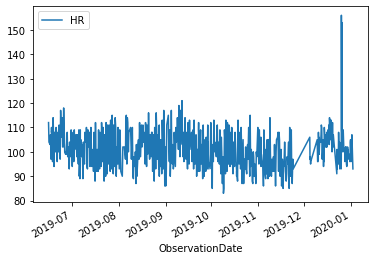

,HR
ObservationDate,
2019-06-15 13:32:39,112
2019-06-15 20:22:36,104
2019-06-16 14:23:34,103
2019-06-16 19:49:24,107
2019-06-17 04:39:15,97


In [44]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
series = df1743
series.plot()
pyplot.show()
series.head()

In [45]:
timediff = series.index.to_series().diff().dt.seconds.div(3600, fill_value=0)
print(timediff.nsmallest(2).iloc[1])
print(timediff.max())
print(timediff.mean())

0.0022222222222222222
23.634166666666665
6.8200911525833785


<AxesSubplot:xlabel='ObservationDate'>

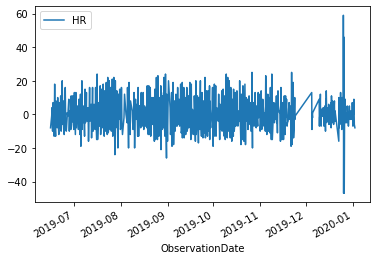

In [46]:
series.diff().plot()


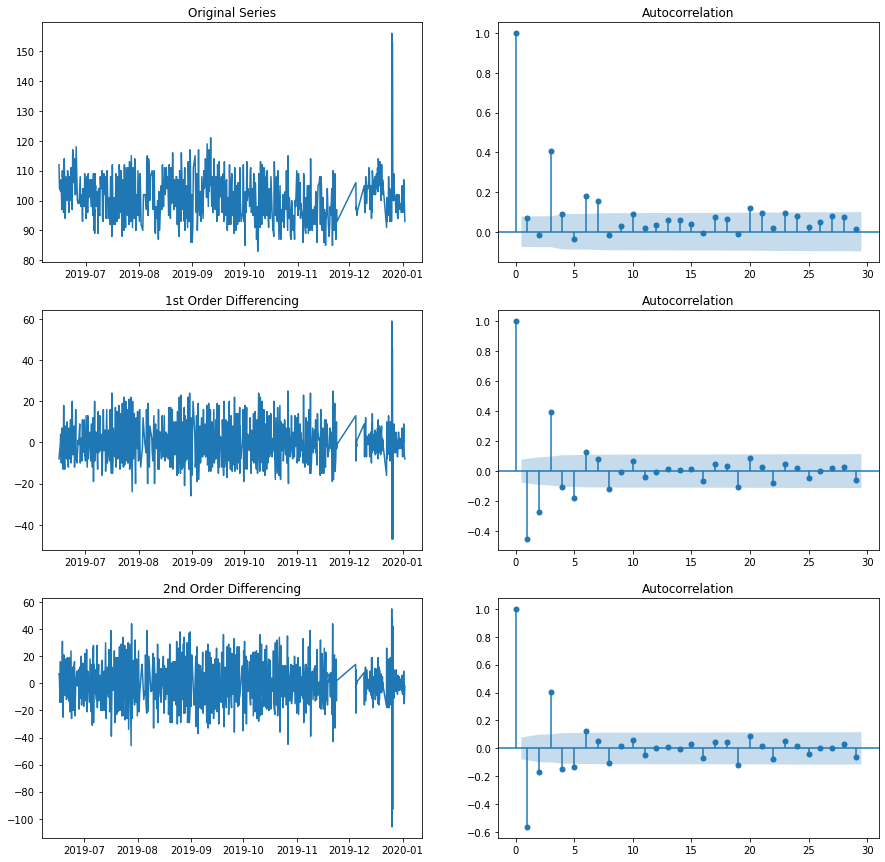

In [47]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))
axes[0, 0].plot(series.HR); axes[0, 0].set_title('Original Series')
plot_acf(series.HR, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(series.HR.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(series.HR.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(series.HR.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(series.HR.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [48]:
from pmdarima.arima.utils import ndiffs
display(test_df.head())
y = test_df.EWS_Total

,PatientId,EWS_Total,SBP,LOC_Score,SpO2,Add_O2_Score,HR,RR,TEMP
0,5583,0,158.0,0,96.0,0.0,62,15,36.6
1,275,1,121.0,0,100.0,0.0,53,10,36.1
2,8326,0,132.0,0,98.0,0.0,68,16,36.5
3,8297,1,136.0,0,91.0,0.0,92,16,36.5
4,8554,1,130.0,0,90.0,0.0,80,20,35.6


In [49]:
ndiffs(y, test='adf')

0